# Проект: Принятие решений в бизнесе.

**Описание проекта:**
Совместно с отделом маркетинга был подготовлен список гипотез для увеличения выручки интернет-магазина.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализироват результаты. 

**Цель исследования**:
1. В рамках приоритизации гипотез предстоит сделать следующее:
  - применить фреймворк ICE для приоритизации гипотез, отсортировать их по убыванию приоритета;
  - применить фреймворк RICE для приоритизации гипотез, отсортировать их по убыванию приоритета;
  - указать, как изменилась приоритизация гипотез при применении RICE вместо ICE, почему так произошло.

2. В рамках анализа A/B-теста предстоит сделать следующее:
  - построить график кумулятивной выручки по группам;
  - построить график кумулятивного среднего чека по группам;
  - построить график относительного изменения кумулятивного среднего чека группы B к группе A;построить график кумулятивного среднего количества заказов на посетителя по группам;
   - построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A;
   - построить точечный график количества заказов по пользователям;
   - посчитать 95-й и 99-й перцентили количества заказов на пользователя;
   - построить точечный график стоимостей заказов;
   - посчитать 95-й и 99-й перцентили стоимости заказов;
   - посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным;
   - посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным;
   - посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным;
   - посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным;
   - принять решение по результатам теста и объяснить его (остановить тест, зафиксировать победу одной из групп//остановить тест, зафиксировать отсутствие различий между группами//продолжить тест.)
   
**План исследования:**

Данные находятся в файлах `/datasets/hypothesis.csv`, `/datasets/orders.csv`,`/datasets/visitors.csv`. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. 

Необходимо проверить данные на ошибки и оценить их влияние на исследование. Затем, на этапе предобработки найти возможность исправить самые критичные ошибки данных.
 
Таким образом, исследование пройдёт в несколько этапов:
 1. Обзор данных.
 2. Предобработка данных.
 3. Часть 1. Приоритизация гипотез.
 4. Часть 2. Анализ A/B-теста.
 5. Общий вывод.

**Описание данных:**

Данные для первой части:

Структура `/datasets/hypothesis.csv`:
 - `Hypothesis` — краткое описание гипотезы;
 - `Reach` — охват пользователей по 10-балльной шкале;
 - `Impact` — влияние на пользователей по 10-балльной шкале;
 - `Confidence` — уверенность в гипотезе по 10-балльной шкале;
 - `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части

Структура `/datasets/orders.csv`:
 - `transactionId` — идентификатор заказа;
 - `visitorId` — идентификатор пользователя, совершившего заказ;
 - `date` — дата, когда был совершён заказ;
 - `revenue` — выручка заказа;
 - `group` — группа A/B-теста, в которую попал заказ.


Структура `/datasets/visitors.csv`:
 - `date` — дата;
 - `group` — группа A/B-теста;
 - `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста/

### Обзор данных

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as stats
from pandas.plotting import register_matplotlib_converters
import warnings

#отображение всех чисел с двумя знаками после запятой
pd.set_option('display.float_format', '{:.2f}'.format)

#уберем ограничение строк и столбцов в отображении
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 100

In [2]:
# чтение датасета, применение условия для открытия файлов из локального расположения или из среды Я.Практикума
# сохранение датасетов в переменные hypothesis, orders, visitors

try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except FileNotFoundError:
    hypothesis = pd.read_csv('hypothesis.csv')
    orders = pd.read_csv('orders.csv')
    visitors = pd.read_csv('visitors.csv')

In [3]:
# вывод основной информации о датафрейме с помощью метода info()
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


In [4]:
# вывод датафрейма
hypothesis.head(9)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
# вывод основной информации о датафрейме с помощью метода info()
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [6]:
# вывод первых 10 строк датафрейма
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [7]:
# вывод последних 10 строк датафрейма
orders.tail(10)

,transactionId,visitorId,date,revenue,group
1187,2274188238,132143192,2019-08-14,750,A
1188,1692103379,1022829655,2019-08-14,112,A
1189,4082620617,393266494,2019-08-14,31550,B
1190,38478481,1197745035,2019-08-14,8600,B
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A
1196,3936777065,2108080724,2019-08-15,202740,B


In [8]:
# вывод основной информации о датафрейме с помощью метода info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [9]:
# вывод первых 10 строк датафрейма
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [10]:
# вывод последних 10 строк датафрейма
visitors.tail(10)

,date,group,visitors
52,2019-08-22,B,650
53,2019-08-23,B,546
54,2019-08-24,B,378
55,2019-08-25,B,679
56,2019-08-26,B,676
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718


In [11]:
#проверка на наличие явных дубликатов
print('Количество дубликатов в hypothesis:', hypothesis.duplicated().sum())
print('Количество дубликатов в orders:', orders.duplicated().sum())
print('Количество дубликатов в visitors:', visitors.duplicated().sum())

Количество дубликатов в hypothesis: 0
Количество дубликатов в orders: 0
Количество дубликатов в visitors: 0


**В результате обзора выявлено**:
  - пропусков и явных дубликатов в датафреймах нет;
  - необходимо привести к змеиному регистру наименования столбцов датафрейма 'hypothesis' и 'orders';
  - необходимо изменить тип данных для дат в датафреймах 'orders' и 'visitors', так как он сейчас в формате object.

### Предобработка данных

In [12]:
# замена названий столбцов и приведение к нижнему регистру:
hypothesis.columns = [x.lower() for x in hypothesis.columns.values]
orders.columns = [x.replace('Id', '_id') for x in orders.columns.values]

In [13]:
# преобразование данных о времени
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

In [14]:
# # проверка результата
# orders.info()

In [15]:
# # проверка результата
# visitors.info()

In [16]:
# проверка наличия в датафреймах пропусков или дубликатов 
# напишем функцию для этого. 
def check (dataset):
    print('Пропуски: ')
    print(dataset.isna().sum())
    print('-'*50)
    print('Дубликаты: ')
    print(dataset.duplicated().sum())
    print('-'*50)
    print('Типы данных: ')
    print(dataset.dtypes)
    return dataset

In [17]:
# проверка результата с помощью функции check
hypothesis = check(hypothesis)

Пропуски: 
hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64
--------------------------------------------------
Дубликаты: 
0
--------------------------------------------------
Типы данных: 
hypothesis    object
reach          int64
impact         int64
confidence     int64
efforts        int64
dtype: object


In [18]:
# проверка результата с помощью функции check
orders = check(orders)

Пропуски: 
transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64
--------------------------------------------------
Дубликаты: 
0
--------------------------------------------------
Типы данных: 
transaction_id             int64
visitor_id                 int64
date              datetime64[ns]
revenue                    int64
group                     object
dtype: object


In [19]:
# проверка результата с помощью функции check
visitors = check(visitors)

Пропуски: 
date        0
group       0
visitors    0
dtype: int64
--------------------------------------------------
Дубликаты: 
0
--------------------------------------------------
Типы данных: 
date        datetime64[ns]
group               object
visitors             int64
dtype: object


**Вывод:** после предобработки, данные находятся в подходящих для проведения расчётов форматах, столбцы поименованы согласно правил змеиного регистра.

### Часть 1. Приоритизация гипотез.

 В нашем распоряжении файл с 9 гипотезами, для которых оценены значения `Reach`, `Impact`, `Confidence` и `Efforts`. Применим к этим оценкам фреймворки `ICE` и `RICE`.

In [20]:
# расчёт ICE для гипотез и сортировка их по убыванию приоритета
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis.sort_values(by='ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


По методу `ICE` наибольший приоритет имеет гипотеза №8

In [21]:
# расчёт RICE для гипотез и сортировка их по убыванию приоритета
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis.sort_values(by='rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


По методу `RICE` на первом месте гипотеза №7, а 8 только на пятом месте.

In [22]:
# посмотрим как изменилась приоритизация гипотез при применении RICE вместо ICE
hypothesis[['hypothesis', 'ice', 'rice']].style.background_gradient(cmap='Blues')

,hypothesis,ice,rice
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333,40.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000,4.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.000000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000,9.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,3.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333,4.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.000000
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,112.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.200000


**Вывод:** 
 - согласно методу `ICE` наибольший приоритет имеет гипотеза №8 - "Запустить акцию, дающую скидку на товар в день рождения пользователя";
 - согласно методу `RICE` на первом месте гипотеза №7 - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email рассылок";
 - такая разница в результатах, вероятно, связана с тем, что метод `ICE` не учитывает скольких пользователей затронет планируемое изменение. Акция, дающую скидку на товар в день рождения пользователя затронет только тех, кто указал дату рождения, и не затронет одновременно всех пользователей. Форма подписки на всех основных страницах затронет большую часть пользователей интернет-магазина.
 

Исходя из уровня влияния, которое гипотезы могут оказать на основную бизнес–цель, уровня уверенности в достижении результата и того, насколько легко будет выполнить данный проект в целом, следует обратить большее внимание на следующие гипотезы:
 - добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (в топе моделей ICE и RICE);  
 - добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (в топе моделей ICE и RICE);  
 - добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (в топе модели RICE).
 
Также, исходя из низкого уровня результата и уровня уверенности, следует отказаться от следующих гипотез:
 - изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей;  
 - добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов;  
 - запустить собственную службу доставки, что сократит срок доставки заказов;  
 - изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар.

### Часть 2. Анализ A/B-теста

In [23]:
#посмотрим на количество пользователей в группах А и В
orders.groupby('group')['visitor_id'].nunique()

group
A    503
B    586
Name: visitor_id, dtype: int64

Посчитаем суммарное число пользователей, заказов и общую выручка заказов в каждой из групп теста

In [24]:
# сгруппируем данные по столбцу с группами A/B-теста
orders_new = (
    orders.groupby('group', as_index=False)
    .agg({'visitor_id' : 'nunique','transaction_id': 'count', 'revenue': 'sum'})
)

print(orders_new) 

  group  visitor_id  transaction_id  revenue
0     A         503             557  4084803
1     B         586             640  5907760


Количество пользователей в группе А - 503, которые совершили 557 заказов на сумму 4 084 803 ден.знаков. Количество пользователей в группе В - 586, которые совершили 640 заказов на сумму 5 907 760 ден.знаков. Некоторые пользователи обеих групп сделали по нескольку заказов.

Проверим, нет ли пользователей, попавших одновременно в обе группы.

In [25]:
doubles = orders.groupby(['visitor_id']).agg({'group' : 'nunique', 'transaction_id' : 'count', 'revenue' : 'sum'}).reset_index()
print(f'Пользователей, попавших в обе группы: {doubles[doubles.group != 1]["visitor_id"].count()}')
print(f"Сумма заказов этих пользователей {doubles[doubles.group != 1]['revenue'].sum()}")
print(f"Количество их заказов {doubles[doubles.group != 1]['transaction_id'].sum()}")

Пользователей, попавших в обе группы: 58
Сумма заказов этих пользователей 1558935
Количество их заказов 181


58 пользователей попали в обе группы. Эти пользователи сделали 181 заказ на более чем 1,5 млн. Неизвестно, какая из версий исследуемой страницы повлияла на их решения, значит, результаты исследования нельзя интерпретировать однозначно. Следует исключить этих пользователей из исследования.

In [26]:
del_list = list(doubles[doubles.group != 1]['visitor_id'])
orders = orders.query('visitor_id not in @del_list')

Мы провели A/B-тест и получили результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`.

Проанализируем A/B-тест.

**График кумулятивной выручки по группам**

In [27]:
# создим массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [28]:
#получим агрегированные кумулятивные по дням данные о заказах
ordersAggregated = (datesGroups
                    .apply(lambda x: orders[(orders['date'] <= x['date']) & (orders['group'] == x['group'])]
                    .agg({'date':'max', 'group':'max', 'transaction_id':pd.Series.nunique, 'visitor_id':pd.Series.nunique, 'revenue':'sum'}), axis=1)
                    .sort_values(by=['date','group'])
                   )


In [29]:
# соберем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = (datesGroups
                      .apply(lambda x: visitors[(visitors['date'] <= x['date']) & (visitors['group'] == x['group'])]
                      .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group'])
                     )

In [30]:
# объединим кумулятивные данные в одной таблице
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

# присвоим столбцам понятные названия
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']



In [31]:
# объявим переменные cumulativeRevenueA и cumulativeRevenueB
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']].reset_index()
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']].reset_index()
cumulativeRevenueA.head()

,index,date,revenue,orders
0,0,2019-08-01,142779,23
1,2,2019-08-02,234381,42
2,4,2019-08-03,346854,66
3,6,2019-08-04,388030,77
4,8,2019-08-05,474413,99


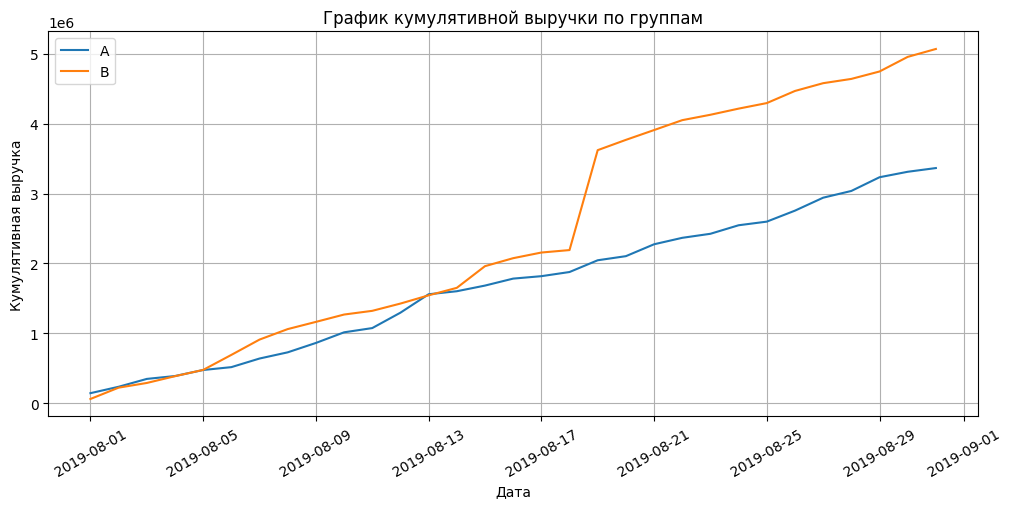

In [32]:
# график кумулятивной выручки по группам
plt.figure(figsize=(12, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.title(label='График кумулятивной выручки по группам')
plt.xticks(rotation=30)
plt.grid()
plt.legend();

**Вывод:** выручка в обеих группах практически равномерносувеличивается на протяжении всего теста. Однако в группе B есть резкий скачок графика, который может свидетельствовать о всплеске числа заказов или о появлении неожидано дорогих заказов.

**График кумулятивного среднего чека по группам**

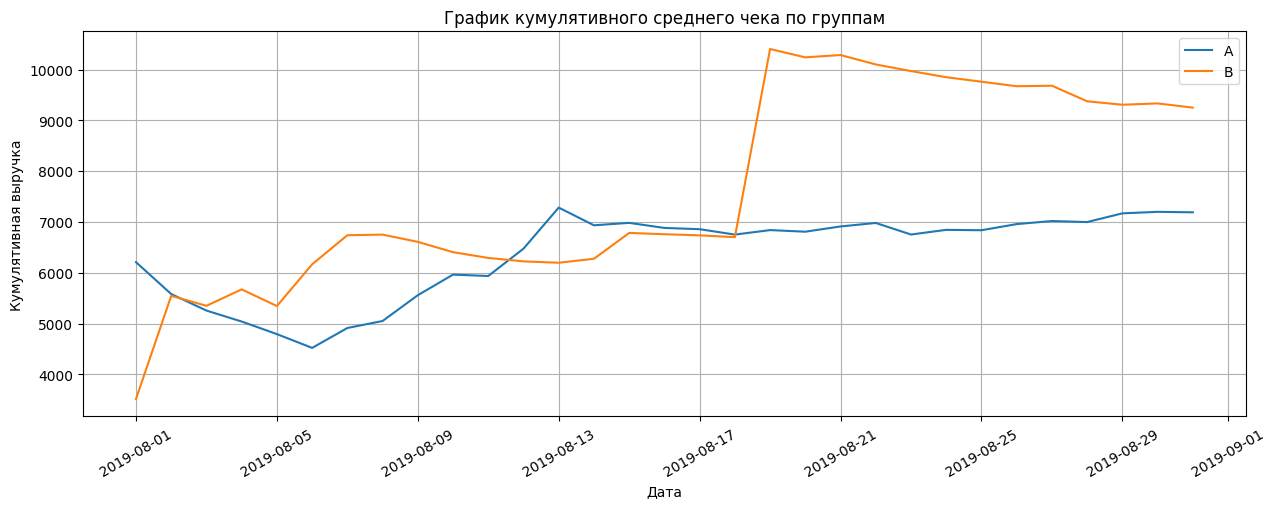

In [33]:
# график кумулятивного среднего чека по группам
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.xticks(rotation=30)
plt.legend()
plt.grid();

Кумулятивное значение среднего чека по сегментам сильно колеблется. Как и в предыдущем графике наблюдается резкое скачкообразное увеличение выручки группы В после 17.08.2019, затем имеется тенденция к снижению. Выручка группы А после 13.08.2019 стабилизировалась.

**График относительного изменения кумулятивного среднего чека группы B к группе A**

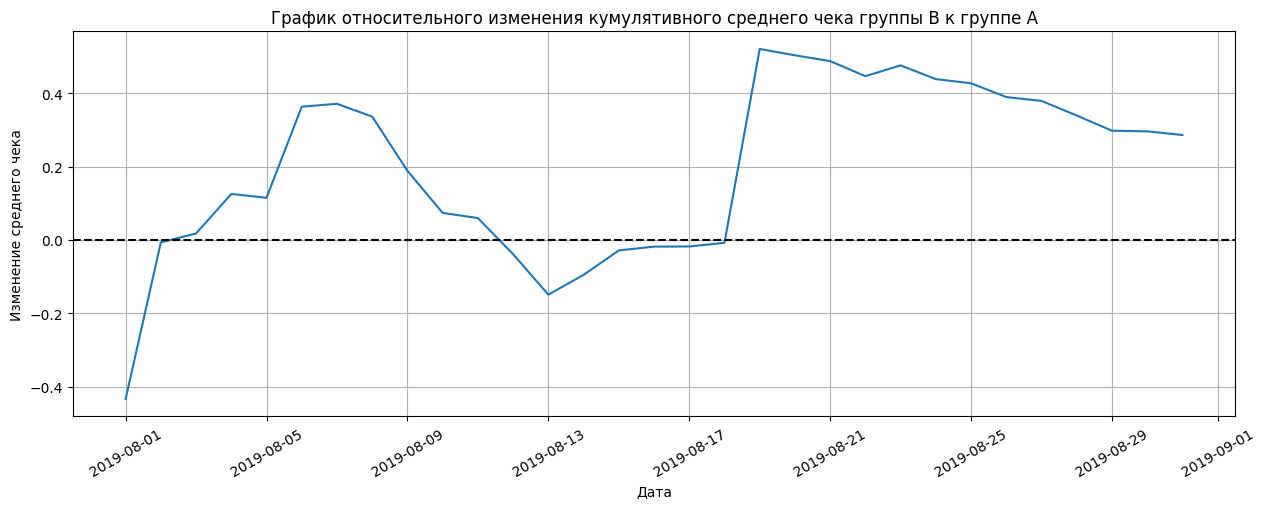

In [34]:
# график относительного изменения кумулятивного среднего чека группы B к группе A
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--') 
plt.grid()
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Изменение среднего чека')
plt.xticks(rotation=30); 

В некоторых точках виден резкий скачок на графике, это говорит о наличии крупных заказов.

**График кумулятивного среднего количества заказов на посетителя по группам**

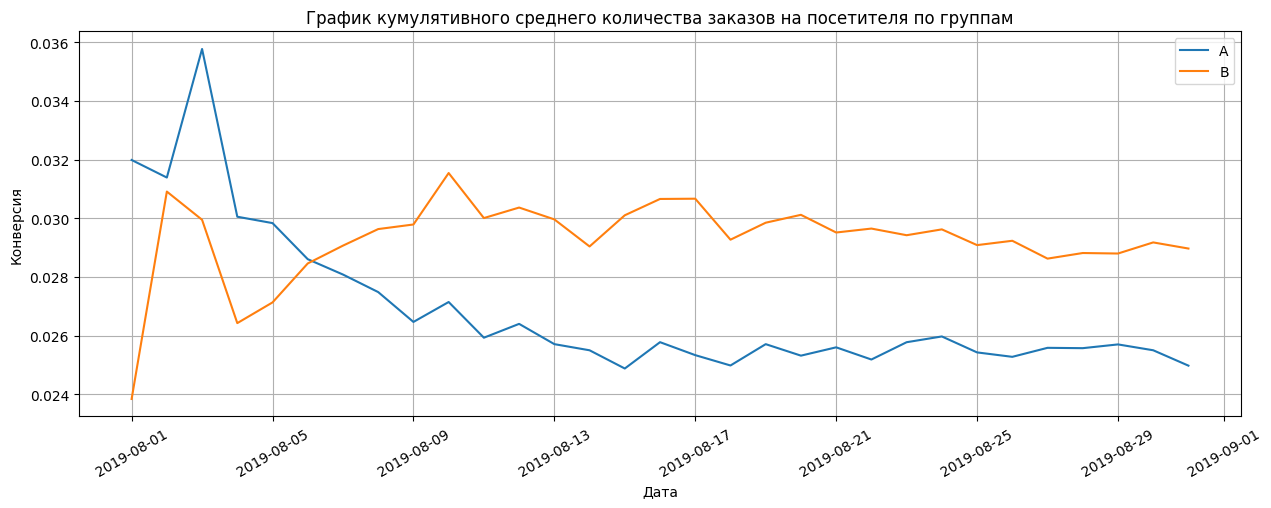

In [35]:
# график кумулятивного среднего количества заказов на посетителя по группам
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A'].reset_index(drop=True)
cumulativeDataB = cumulativeData[cumulativeData['group']=='B'].reset_index(drop=True)

plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel('Конверсия')
plt.xlabel('Дата')
plt.xticks(rotation=30)
plt.legend()
plt.grid();

Группы стартовали с очень разных значений, с течением времени группа А просела, группа В стабилизировалась выше группы А.  

**График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A**

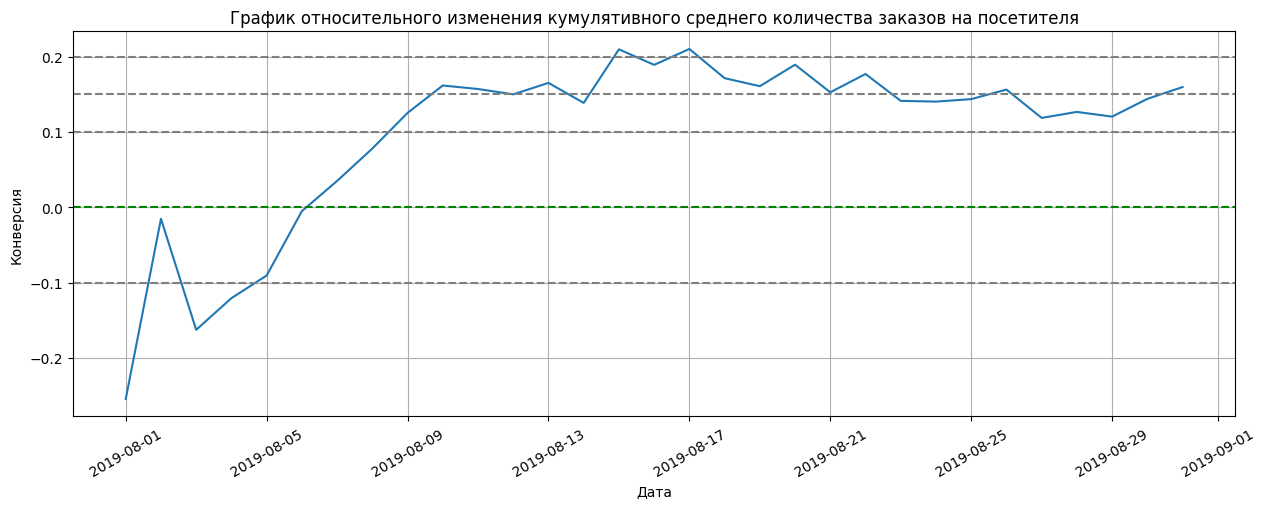

In [36]:
# график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.axhline(y=0, color='green', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')

plt.axhline(y=0.10, color='grey', linestyle='--')
plt.axhline(y=0.20, color='grey', linestyle='--')
plt.axhline(y=-0.10, color='grey', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.xticks(rotation=30)
plt.grid();

Конверсия группы B лидирует по среднему числу заказов. Её прирост достиг ~15-20% относительно группы А.

**Точечный график количества заказов по пользователям**

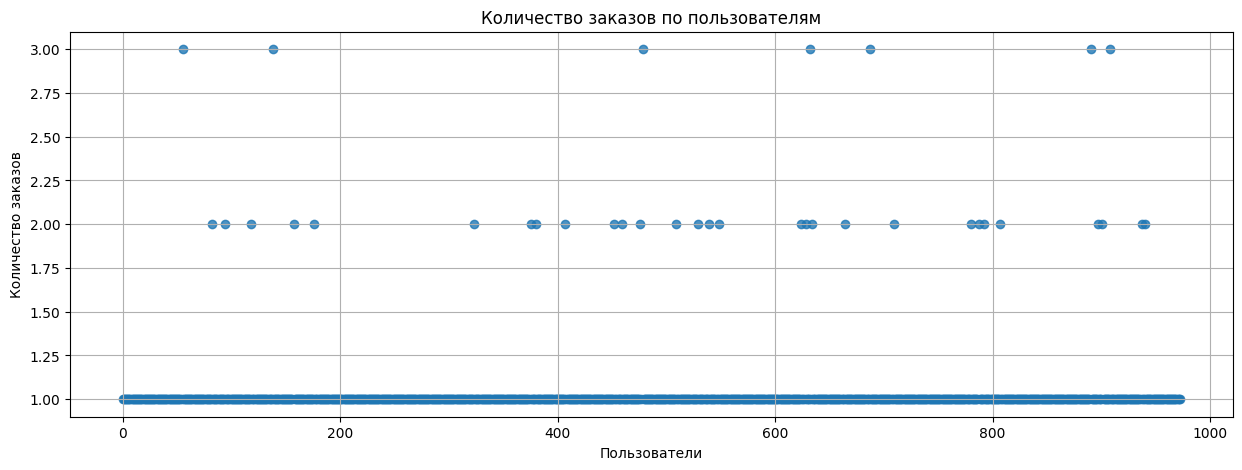

In [37]:
# точечный график количества заказов по пользователям
# датафрейм с количеством заказов по пользователям:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsers.columns = ['visitor_id','orders']

#построим точечную диаграмму числа заказов на одного пользователя:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(15,5))
plt.title('Количество заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.scatter(x_values, ordersByUsers['orders'], alpha=0.8);
plt.grid();

Основное количество пользователей совершили 1 заказ. Значительно меньше заказавших более двух раз. В этом случае, значения более двух заказов можно считать единичными выбросами. 

**95-й и 99-й перцентили количества заказов на пользователя**

In [38]:
# расчёт 95-й и 99-й перцентилей количества заказов на пользователя
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


Только 1% пользователей совершили более 2-х заказов, поэтому возьмём это значение за границу для определения аномальных пользователей.

**Точечный график стоимостей заказов**

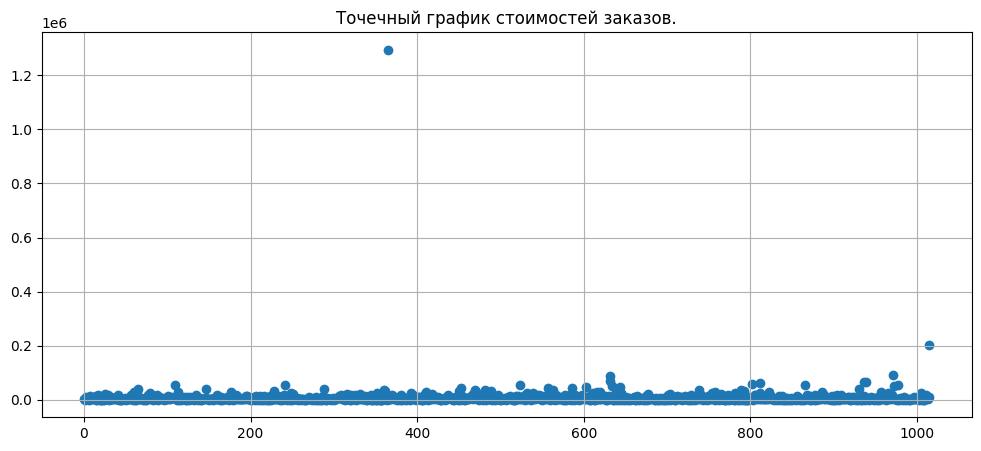

In [39]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(12, 5))
plt.title(label='Точечный график стоимостей заказов.')
plt.scatter(x_values, orders['revenue'])
plt.grid();

Заказов дороже 200 000 рублей очень мало. Один заказ на 1,2 миллиона выглядит аномально.

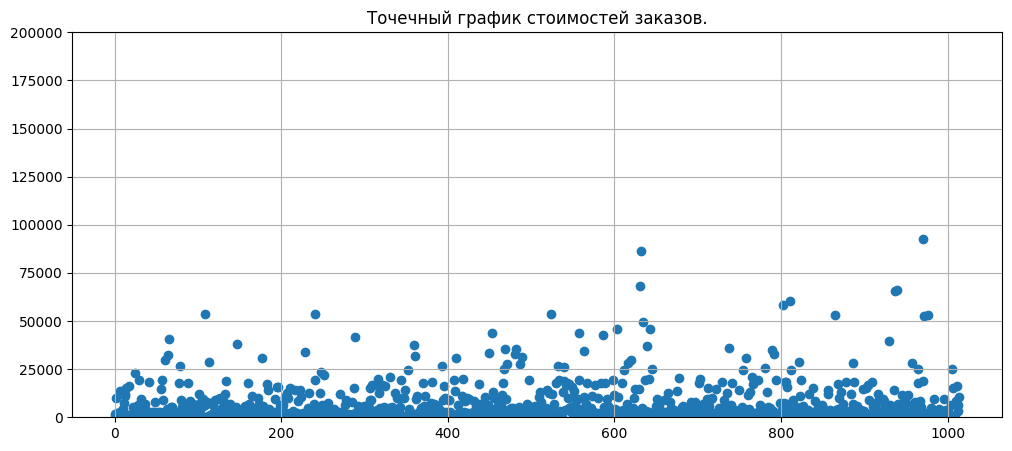

In [40]:
# посмотрим точечный график крупнее, в диапазоне от 0 до 200000 
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(12, 5))
plt.title(label='Точечный график стоимостей заказов.')
plt.ylim(0, 200000)
plt.scatter(x_values, orders['revenue'])
plt.grid();

Ограничив график по оси у, можно рассмотреть рассеивание цены вблизи - большая часть заказов.

**95-й и 99-й перцентили стоимости заказов**

In [41]:
# расчёт 95-й и 99-й перцентилей стоимости заказов
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


Не более, чем у 5% заказов чек более 26785, и только у 1% - более 53904. Таким образом, границей для определения аномалий стоимости заказов будет сумма заказа свыше 53904.

**Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным**

Нулевая гипотеза: среднее количество заказов на посетителя между группами А и В не отличаются.

Альтернативная гипотеза: среднее количество заказов на посетителя между группами А и В имеют статистически значимые отличия.

Уровень значимости принимаем за 0.05.

In [42]:
orders_agg_a = orders[orders['group'] == 'A'].groupby('date').agg({'transaction_id' : 'nunique', 
                                       'visitor_id' : 'nunique', 
                                       'revenue' : 'sum'}).sort_values(by='date').cumsum().reset_index()


orders_agg_b = orders[orders['group'] == 'B'].groupby('date').agg({'transaction_id' : 'nunique', 
                                       'visitor_id' : 'nunique', 
                                       'revenue' : 'sum'}).sort_values(by='date').cumsum().reset_index()

In [43]:
#добавляем данные о посетителях
orders_agg_a['vis_agg_a'] = visitors[visitors['group'] == 'A']['visitors'].reset_index(drop=True).cumsum(axis=0)
orders_agg_b['vis_agg_b'] = visitors[visitors['group'] == 'B']['visitors'].reset_index(drop=True).cumsum(axis=0)

In [44]:
# таблица со сгруппированными по дням и группам заказами
orders_date = orders.groupby(['date', 'group']).agg({'transaction_id' : 'nunique', 
                                       'visitor_id' : 'nunique', 
                                       'revenue' : 'sum'}).sort_values(by=['date','group']).reset_index()

In [45]:
# по группе A
data_a = orders_agg_a[['date', 'transaction_id', 'revenue', 'vis_agg_a']]\
.merge(orders_date[orders_date['group']=='A'][['date', 'transaction_id', 'revenue']], on='date', how='left')

data_a = data_a.merge(visitors[visitors['group'] == 'A'][['date', 'visitors']], on='date', how='left')

data_a.columns = ['date', 'orders_agg', 'revenue_agg', 'visiters_agg', 'orders_daily', 'revenue_daily', 'visitors_daily']

In [46]:
# по группе B
data_b = orders_agg_b[['date', 'transaction_id', 'revenue', 'vis_agg_b']]\
.merge(orders_date[orders_date['group']=='B']
[['date', 'transaction_id', 'revenue']], on='date', how='left')

data_b = data_b.merge(visitors[visitors['group'] == 'B'][['date', 'visitors']], on='date', how='left')

data_b.columns = ['date', 'orders_agg', 'revenue_agg', 'visitors_agg', 'orders_daily', 'revenue_daily', 'visitors_daily']

In [47]:
# создание списков для анализа конверсии
order_users_A = (
    orders[orders['group'] == 'A'].groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)

order_users_B = (
    orders[orders['group'] == 'B'].groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)

sample_A = pd.concat([order_users_A['transaction_id'], 
                     pd.Series(0,index=np.arange(data_a['visitors_daily'].sum() - len(order_users_A['transaction_id'])), 
                               name='orders')], axis=0)

sample_B = pd.concat([order_users_B['transaction_id'], 
                     pd.Series(0,index=np.arange(data_b['visitors_daily'].sum() - len(order_users_B['transaction_id'])), 
                               name='orders')], axis=0)

In [48]:
# H0 - среднее количество заказов на посетителя между группами А и В не отличаются.
# # H1 - среднее количество заказов на посетителя между группами А и В имеют статистически значимые отличия
alpha = 0.05
results = stats.mannwhitneyu(sample_A, sample_B)
print('alpha =', 0.05)
print('p-value = {0:.3f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')   
print('Относительное изменение количества заказов на посетителя в группе B по отношению к группе A :{0:.3f}'.format(sample_B.mean() / sample_A.mean() - 1))

alpha = 0.05
p-value = 0.011
Отвергаем нулевую гипотезу
Относительное изменение количества заказов на посетителя в группе B по отношению к группе A :0.160


На имеющихся "сырых" данных, на уровне значимости 5%, есть основания отвергнуть нулевую гипотезу об отсутствии отличий среднего количества заказов на посетителя между группами А и В. Относительный прирост среднего количества заказов на посетителя группы В к группе А по «сырым» данным равен 16%.

**Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным**

Нулевая гипотеза: средний чек между группами не отличается.

Альтернативная гипотеза: средний чек между группами имеет статистически значимое отличие.

Уровень значимости принимаем за 0.05.

In [49]:
# H0 - средний чек между группами не отличается.
# H1 - средний чек между группами имеет статистически значимое отличие
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print('alpha =',0.05)
# print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('p-value = {0:.3f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print('Относительное изменение среднего чека заказа в группе B по отношению к группе A :{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))


alpha = 0.05
p-value = 0.829
Не получилось отвергнуть нулевую гипотезу
Относительное изменение среднего чека заказа в группе B по отношению к группе A :0.287


На имеющихся "сырых" данных, на уровне значимости 5%, нет оснований отвергнуть нулевую гипотезу об отсутствии отличий средний чек между группами А и В. Относительный прирост среднего чека заказа между группами по «сырым» данным равен 28,7%. 

**Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным**

 Предварительно очистим данные от "аномальных выбросов", чтобы они не повлияли на результаты теста. За основу возьмем ранее полученные показатели перцентилей. 95-й перцентиль среднего чека - 26785, 99-й перцентиль - 53904. 95-й и 99-й перцентили количества заказов на одного пользователя равны 1 и 2 заказам на пользователя. Поэтому за аномальных пользователей принимаем тех, кто совершил более 2 заказов или совершил заказ на сумму свыше 27 000. Так будут удалены 1% пользователей с наибольшим числом заказов и от 1% до 5% заказов с наибольшей стоимостью.

In [50]:
# пользователи с несколькими заказами
mult_orders = orders.groupby('visitor_id')['transaction_id'].count().reset_index()
mult_orders = mult_orders[mult_orders['transaction_id'] > 2]['visitor_id']

# пользователи с дорогими заказами
expensive_orders = orders[orders['revenue'] > 27000]['visitor_id'].reset_index(drop=True)

abnormal_users = pd.Series((list(mult_orders) + list(expensive_orders)), name='visitors_id').drop_duplicates()
print(abnormal_users.head())
len(abnormal_users)

0     249864742
1     611059232
2    2108163459
3    2742574263
4    2988190573
Name: visitors_id, dtype: int64


58

 Всего таких пользователей - 58.

Теперь, имея список аномальных пользователей, можно очистить данные и проанализировать их.

In [51]:
sample_A_filt = pd.concat([order_users_A.query('not visitor_id in @abnormal_users')['transaction_id'], 
                          pd.Series(0, index=np.arange(data_a['visitors_daily'].sum() - len(order_users_A['transaction_id'])), 
                                    name='orders')], axis=0)
sample_B_filt = pd.concat([order_users_B.query('not visitor_id in @abnormal_users')['transaction_id'], 
                          pd.Series(0, index=np.arange(data_b['visitors_daily'].sum() - len(order_users_B['transaction_id'])), 
                                    name='orders')], axis=0)

Нулевая гипотеза: среднее количество заказов на посетителя между группами не отличается.

Альтернативная гипотеза: среднее количество заказов на посетителя между группами имеет статистически значимое отличие.

Уровень значимости принимаем за 0.05.

In [52]:
results = stats.mannwhitneyu(sample_A_filt, sample_B_filt)
print('alpha =',0.05)
print('p-value = {0:.3f}'.format(results.pvalue))
# print('{0:.3f}'.format(stats.mannwhitneyu(sample_A_filt, sample_B_filt)[1]))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
print('Относительное изменение количества заказов на посетителя в группе B по отношению к группе A по «очищенным» данным :{0:.3f}'.format(sample_B_filt.mean()/sample_A_filt.mean()-1))

alpha = 0.05
p-value = 0.012
Отвергаем нулевую гипотезу
Относительное изменение количества заказов на посетителя в группе B по отношению к группе A по «очищенным» данным :0.182


На имеющихся "очищенных" данных, на уровне значимости 5%, есть основания отвергнуть нулевую гипотезу об отсутствии отличий среднего количества заказов на посетителя между группами А и В. Относительный прирост среднего количества заказов на посетителя группы В к группе А по «очищенным» данным равен 18,2%, что почти на 2,2 процентных пункта больше предыдущего результата. 

**Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным**

Нулевая гипотеза: средний чек посетителя между группами не отличается.

Альтернативная гипотеза: средний чек посетителя между группами имеет статистически значимое отличие.

Уровень значимости принимаем за 0.05.

In [53]:
results = stats.mannwhitneyu(orders.query('group == "A" and not visitor_id in @abnormal_users')['revenue'], 
                                      orders.query('group == "B" and not visitor_id in @abnormal_users')['revenue'])
print("alpha =",0.05)
print('p-value = {0:.3f}'.format(results.pvalue))
# print('{0:.3f}'.format(stats.mannwhitneyu(orders.query('group == "A" and not visitor_id in @abnormal_users')['revenue'], 
#                                       orders.query('group == "B" and not visitor_id in @abnormal_users')['revenue'])[1]))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
print('Относительное изменение среднего чека заказа в группе B по отношению к группе A :{0:.3f}'.format(orders.query('group == "B" and not visitor_id in @abnormal_users')['revenue'].mean() / 
                       orders.query('group == "A" and not visitor_id in @abnormal_users')['revenue'].mean() - 1))

alpha = 0.05
p-value = 0.646
Не получилось отвергнуть нулевую гипотезу
Относительное изменение среднего чека заказа в группе B по отношению к группе A :-0.048


На имеющихся "очищенных" данных, на уровне значимости 5%, нет оснований отвергнуть нулевую гипотезу об отсутствии отличий среднего чека между группами А и В и считать, что в среднем чеке есть различия, по-прежнему нет. А вот средний чек группы B без выбросов стал немного ниже среднего чека группы A. Аномальные заказы были удалены и средние чеки сравнялись.

**Решение по результатам теста:** 

Исходя из обнаруженных фактов, A/B-тест для интернет-магазина можно остановить и зафиксировать победу группы В.

**Если говорит о среднем количестве заказов на посетителя:**
 - в результате расчётов установлено что есть статистически значимое различие по среднему количеству заказов между группами А и В как по сырым данным, так и после фильтрации аномалий
 - график различия в среднем количестве заказов между группами показывает, что результаты группы B лучше группы A: имеют тенденцию к росту;
 -  относительный прирост среднего количества заказов на посетителя группы В к группе А по «сырым» данным равен 16%, а по очищенным 18,2%.

**Если говорит  о среднем чеке:**
 - в ходе вычислений установлено, что нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
 - графики, показывающие изменения кумулятивного среднего чека между группами говорят о том, что результаты группы B выше результатов группы A. У группы В наблюдалось увеличение выручки, засчет крупных заказов;
 - из-за влияния аномально крупных заказов, средний чек в группе B выше на 28,7% среднего чека группы A по неочищенным данным, и практически равен между двумя группами при очищенных данных.
 
На основе вышесказанного можно сделать вывод, что группа В статистически лучше группы А по количеству заказов на посетителя и относительному приросту среднего чека заказа.
 

### Общий вывод

Задачей исследования было:

- приоритизировать гипотезы,
- запустить A/B-тест,
- проанализировать результаты.


В ходе предобработки данных:
 - произведена замена названия столбцов, приведение их к нижнему регистру и правильному стилю;
 - приведены к необходимому типу данных в столбцах, содержащих информацию о дате и времени.
 

Приоритизация гипотез очень важна. Она помогает понять, что следует выполнять в первую очередь, чтобы донести до пользователя максимум ценности, улучшить метрики и заработать больше денег для компании.

Исходя из уровня влияния, которое гипотезы могут оказать на основную бизнес–цель, уровня уверенности в достижении результата и того, насколько легко будет выполнить данный проект в целом, следует обратить большее внимание на следующие гипотезы:
 - добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (в топе моделей ICE и RICE);  
 - добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (в топе моделей ICE и RICE);  
 - добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (в топе модели RICE).


С помощью A/B-теста проверены гипотезы и экспериментально оценены предпочтения посетителей. Чтобы получить статистически значимый результат исключено влияние сегментов друг на друга, т.е. сделано так, что каждый пользователь был отнесен строго к одному сегменту. Показатели которые хотели улучшить среднее количество заказов,  и величина среднего чека.
 

По итогу теста зафиксирована победа группы В, которая показала себя лучше группы А по показателям:
 - количество заказов на посетителя;
 - относительный прирост среднего чека заказа в группе В засчет крупных заказов.
 
Эксперимент удался! Пользователи будут заказывать больше, если перед ними окажется версия страницы сайта, которой пользовались покупатели группы В, что в перспективе положительно повлияет на выручку.